In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data = pd.read_csv('../data/train.csv')
#print(diabetes_data['가격'].value_counts())
data.head(3)

,ID,생산년도,모델출시년도,브랜드,차량모델명,판매도시,판매구역,주행거리,배기량,압축천연가스(CNG),경유,가솔린,하이브리드,액화석유가스(LPG),가격
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81


In [12]:
data.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57920 entries, 0 to 57919
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           57920 non-null  object 
 1   생산년도         57920 non-null  int64  
 2   모델출시년도       57920 non-null  int64  
 3   브랜드          57920 non-null  object 
 4   차량모델명        57920 non-null  object 
 5   판매도시         57920 non-null  object 
 6   판매구역         57920 non-null  object 
 7   주행거리         57920 non-null  int64  
 8   배기량          57920 non-null  int64  
 9   압축천연가스(CNG)  57920 non-null  int64  
 10  경유           57920 non-null  int64  
 11  가솔린          57920 non-null  int64  
 12  하이브리드        57920 non-null  int64  
 13  액화석유가스(LPG)  57920 non-null  int64  
 14  가격           57920 non-null  float64
dtypes: float64(1), int64(9), object(5)
memory usage: 6.6+ MB


전처리 _ 결측치 확인

In [3]:
# Nan 확인
data.isna().sum()

ID             0
생산년도           0
모델출시년도         0
브랜드            0
차량모델명          0
판매도시           0
판매구역           0
주행거리           0
배기량            0
압축천연가스(CNG)    0
경유             0
가솔린            0
하이브리드          0
액화석유가스(LPG)    0
가격             0
dtype: int64

In [68]:
# KOR -> ENG
def columns_toENG(Data):
    
    Data = Data.rename(columns={'생산년도':'Year_prd','모델출시년도':'Year_model','브랜드':'Brand','차량모델명':'Model','판매도시':'City','판매구역':'Area'})
    Data = Data.rename(columns={'주행거리':'Mileage','배기량':'CC','압축천연가스(CNG)':'Fuel_CNG','경유':'Fuel_Diesel','가솔린':'Fuel_Gasoline','하이브리드':'Fuel_Hybrid','액화석유가스(LPG)':'Fuel_LPG','가격':'Price'})

    return Data

df = columns_toENG(data)
df

,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


전처리 _ 중고차 분리

In [69]:
# 주행거리가 200km 미만인 데이터 갯수 : 1221개
len(df[df['Mileage']<200])

1221

In [70]:
# Criteria : 중고차 최소 km 기준

def drop_newCar(Data,Criteria):

    print("Before Datasets size : ", len(Data))
    newCar_idx = Data[Data['Mileage']<Criteria].index
    Data = Data.drop(index = newCar_idx)
    print("Delete Datasets size : ",len(newCar_idx))
    print("After Datasets size : ", len(Data))

    return Data

df = drop_newCar(df,200)
df

Before Datasets size :  57920
Delete Datasets size :  1221
After Datasets size :  56699


,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,KAT,SLA,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,RKO,SWI,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,GNI,WIE,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,EHX,WIE,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,OSW,MAL,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,POZ,WIE,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,XOK,ZAC,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,CIE,MAZ,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,ZRI,DOL,189321,1598,0,0,1,0,0,16.77


주행거리 이상치

In [71]:
# 주행거리가 2500000인 것은 이상치라고 판단하여 제거함
df = df[df['Mileage'] != df['Mileage'].max()]

In [13]:
df['Mileage'].describe()

count     56698.000000
mean     171442.912960
std       79714.557265
min         200.000000
25%      116287.000000
50%      173000.000000
75%      221000.000000
max      900000.000000
Name: Mileage, dtype: float64

In [14]:
df['Mileage'].quantile(0.02), df['Mileage'].quantile(0.025)

(20987.04, 24680.200000000004)

전처리 _ 문자 -> 숫자 (Brand, Model, City, Area)

In [72]:
#xData_ = pd.get_dummies(xData)

# xData['Brand'] = xData['Brand'].astype('category')
# pd.get_dummies(xData['Brand'])

# Label Encoder
from sklearn.preprocessing import LabelEncoder

#label_col = ['Brand','Model','City','Area']
label_col = ['City','Area']

def strToInt(label_List, data):
    for i in label_List:
        item_label = data[i]
        #print(item_label)
        encoder = LabelEncoder()
        encoder.fit(item_label)
        data[i] = encoder.transform(item_label)
    return encoder

encoder = strToInt(label_col, df)
# One-Hot Encoder
# from sklearn.preprocessing import OneHotEncoder

# label_col = ['Brand','Model','City','Area']

# for i in label_col:
#     items = xData[i]

#     oh_encoder=OneHotEncoder()
#     oh_encoder.fit(items)
#     oh_encoder.categories_
#     oh_labels = oh_encoder.transform(items)
#     arrayData = oh_labels.toarray()
#     xData[i] = arrayData

df

C:\Users\user\AppData\Local\Temp\ipykernel_16332\4049387445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.transform(item_label)
C:\Users\user\AppData\Local\Temp\ipykernel_16332\4049387445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.transform(item_label)


,ID,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
0,TRAIN_00000,2018,2014,skoda,fabia,1214,12,85231,999,0,0,1,0,0,51.74
1,TRAIN_00001,2010,2006,toyota,auris,2137,13,135000,1598,0,0,1,0,0,41.47
2,TRAIN_00002,2002,2002,mercedes-benz,clk-klasa,785,15,255223,1796,0,0,1,0,0,17.81
3,TRAIN_00003,2006,2001,nissan,x-trail,546,15,238000,2184,0,1,0,0,0,18.20
4,TRAIN_00004,2007,2007,fiat,bravo,1839,5,251000,1910,0,1,0,0,0,17.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57915,TRAIN_57915,2017,2011,mercedes-benz,b-klasa,1957,15,64839,1461,0,1,0,0,0,116.87
57916,TRAIN_57916,2006,2005,opel,zafira,2941,16,299850,1796,0,0,1,0,0,15.47
57917,TRAIN_57917,2013,2003,fiat,punto,287,6,112000,1368,0,0,1,0,0,21.97
57918,TRAIN_57918,2006,2004,opel,astra,3174,0,189321,1598,0,0,1,0,0,16.77


전처리 _ 상관계수

In [16]:
# 숫자 항 만 상관계수 작성
def myCorr(data):

    corrList=[]
    tmp = data.dtypes
    findtype = ['int32','int64','float32', 'float64']
    for index,val in zip(tmp.index, tmp.values):
        if val in findtype:
            corrList.append(index)

    corrData = data[corrList].corr()

    print(corrData)
    
    # 시각화
    import seaborn as sns

    corrData.to_csv('corr.csv')

    figure = plt.figure(figsize=(15,15),facecolor='white')
    sns.heatmap(corrData, annot=True, cmap='Blues')

    #그림 파일 세이브
    figure.savefig('corr00.png')


               Year_prd  Year_model     Brand     Model      City      Area  \
Year_prd       1.000000    0.895096  0.157869  0.043803  0.008692  0.004454   
Year_model     0.895096    1.000000  0.137102  0.030631  0.009818  0.003001   
Brand          0.157869    0.137102  1.000000  0.180742 -0.004036  0.000247   
Model          0.043803    0.030631  0.180742  1.000000  0.000706 -0.003019   
City           0.008692    0.009818 -0.004036  0.000706  1.000000 -0.057444   
Area           0.004454    0.003001  0.000247 -0.003019 -0.057444  1.000000   
Mileage       -0.606174   -0.550889 -0.162317  0.004810 -0.008575 -0.010736   
CC            -0.287770   -0.263283 -0.273215  0.096608  0.013383 -0.013680   
Fuel_CNG       0.000937   -0.000615  0.004864  0.013079  0.003794  0.003988   
Fuel_Diesel    0.096499    0.082749 -0.074651  0.080428  0.002456  0.016361   
Fuel_Gasoline -0.064574   -0.054220  0.060251 -0.074941 -0.002373 -0.003029   
Fuel_Hybrid    0.099534    0.101910  0.088149 -0.008

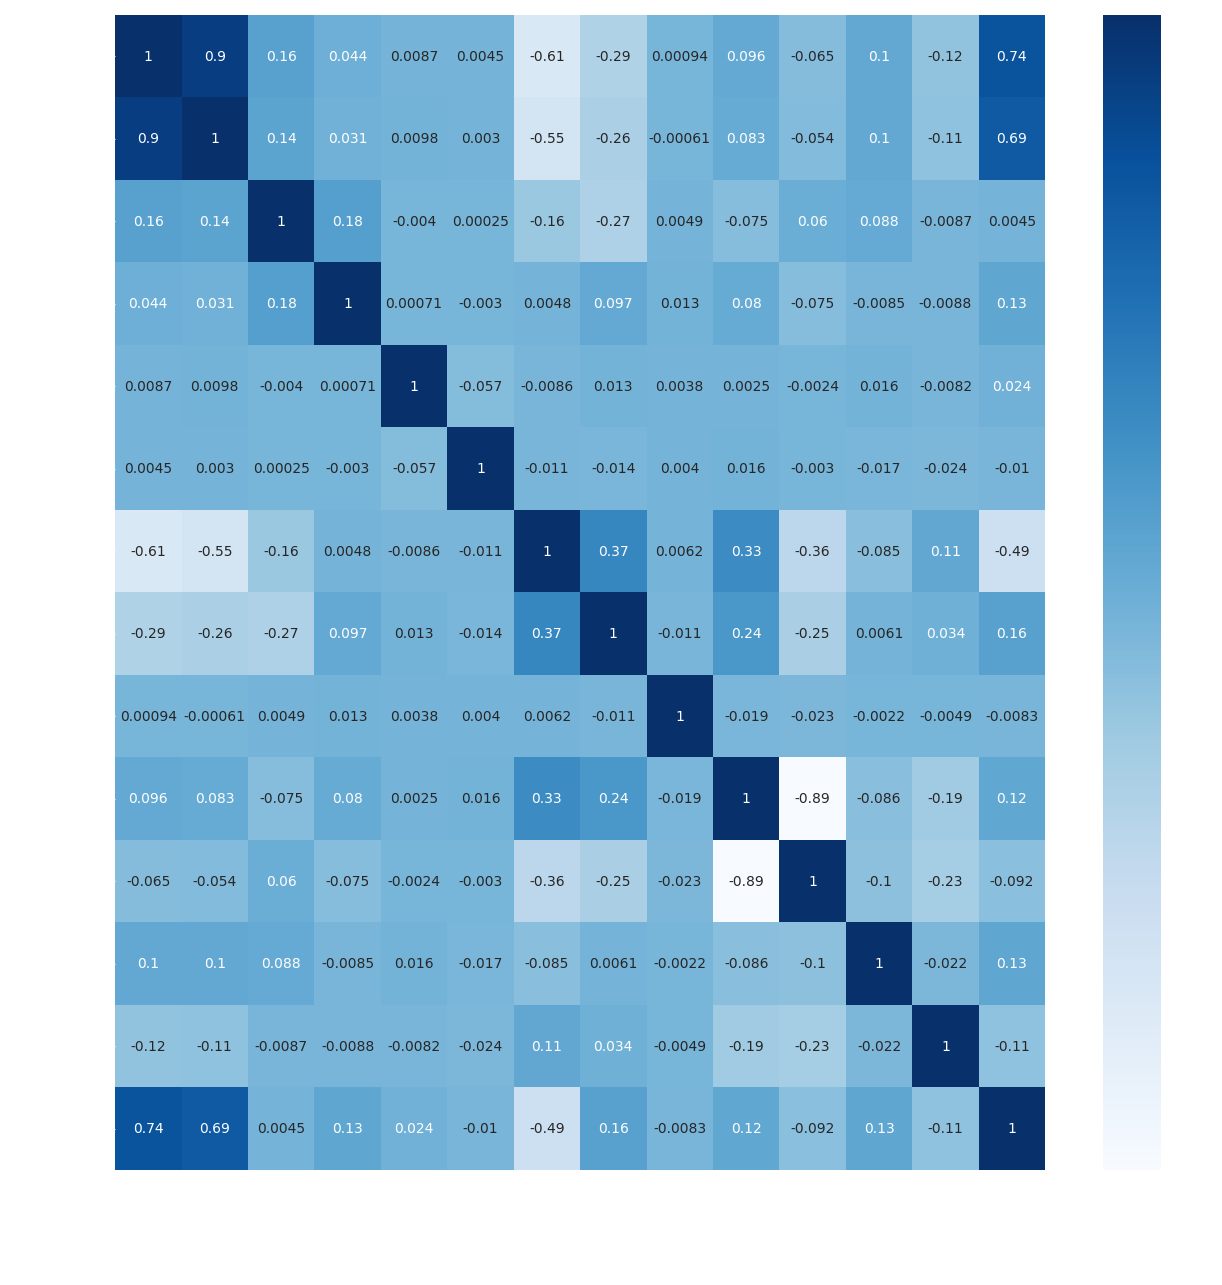

In [18]:
myCorr(df)

전처리 _ 산점도

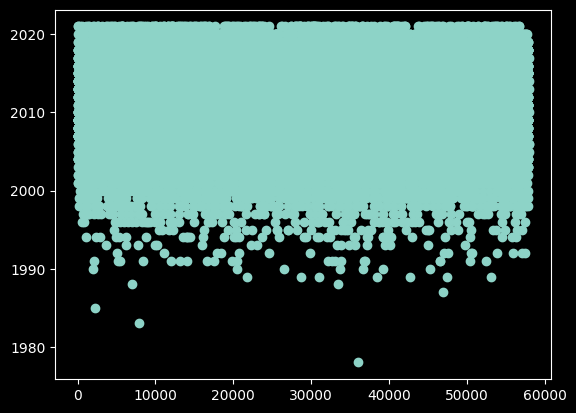

In [33]:
plt.scatter(df.index, df)

['ID', 'Year_prd', 'Year_model', 'Brand', 'Model', 'City', 'Area', 'Mileage', 'CC', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline', 'Fuel_Hybrid', 'Fuel_LPG', 'Price']


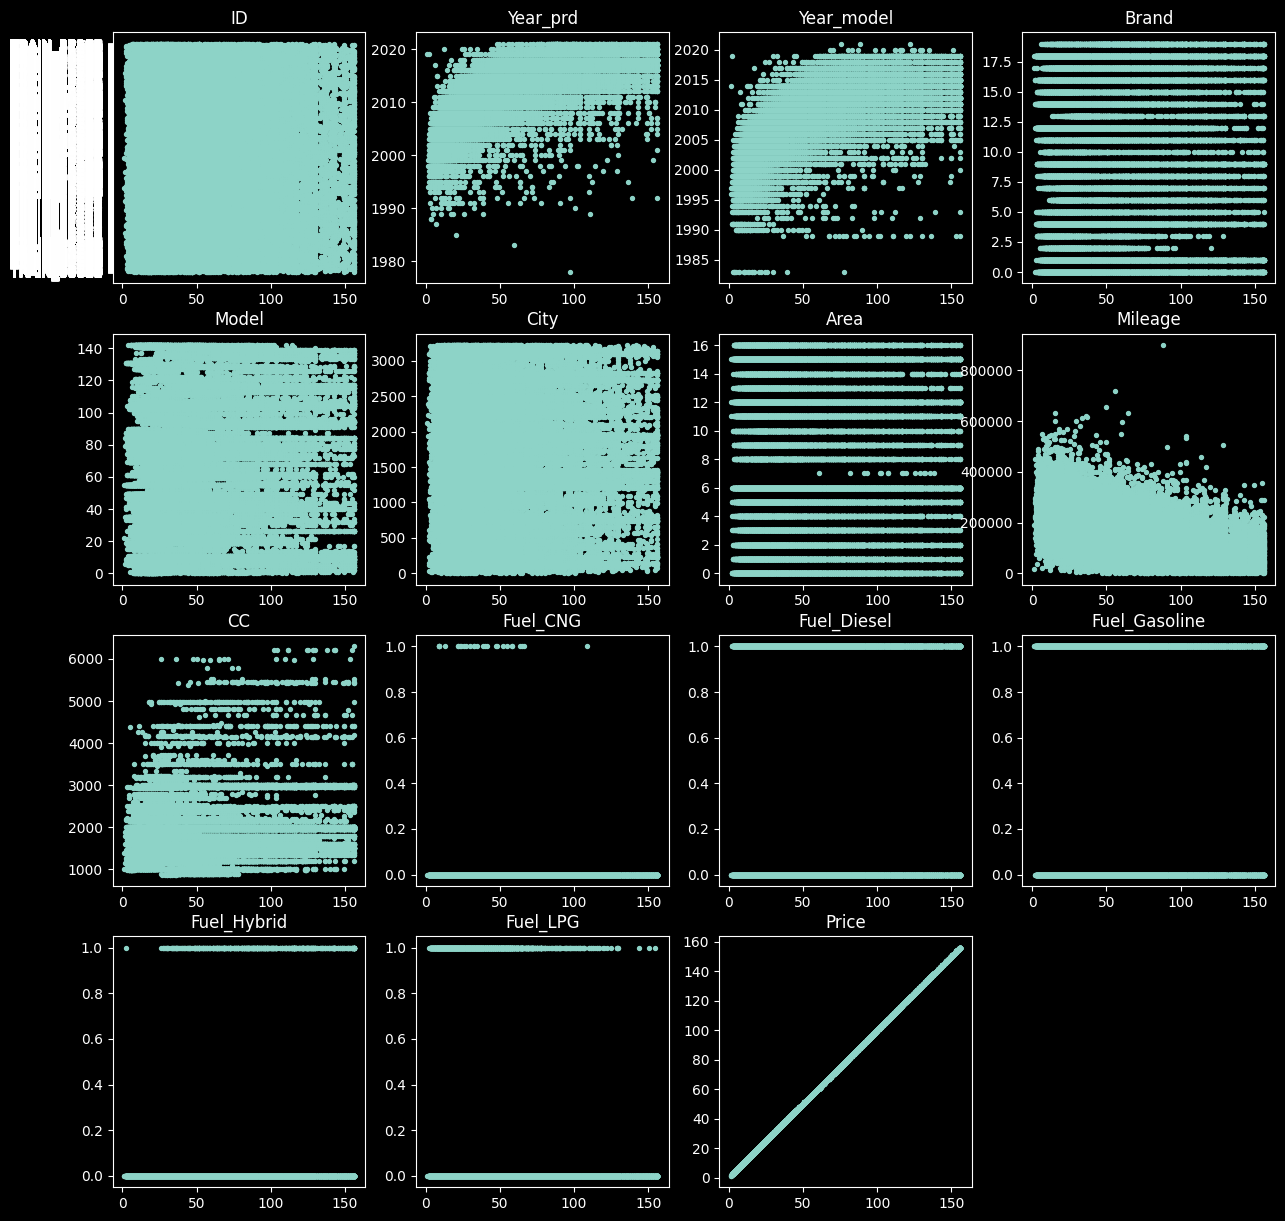

In [19]:


tmp = df.dtypes
valList=[]
findType=['int32','int64','float32','float64']
for index, val in zip(tmp.index, tmp.values):
    #if index in findType:
    valList.append(index)

print(valList)
#lenL = len(valList)

figure = plt.figure(figsize=(15,15))
for cnt, val in enumerate(valList):
    plt.subplot(4, 4, cnt+1)
    plt.scatter(df['Price'], df[val],s=8)
    plt.title(val)

#그림 파일 세이브
figure.savefig('scatter00.png')

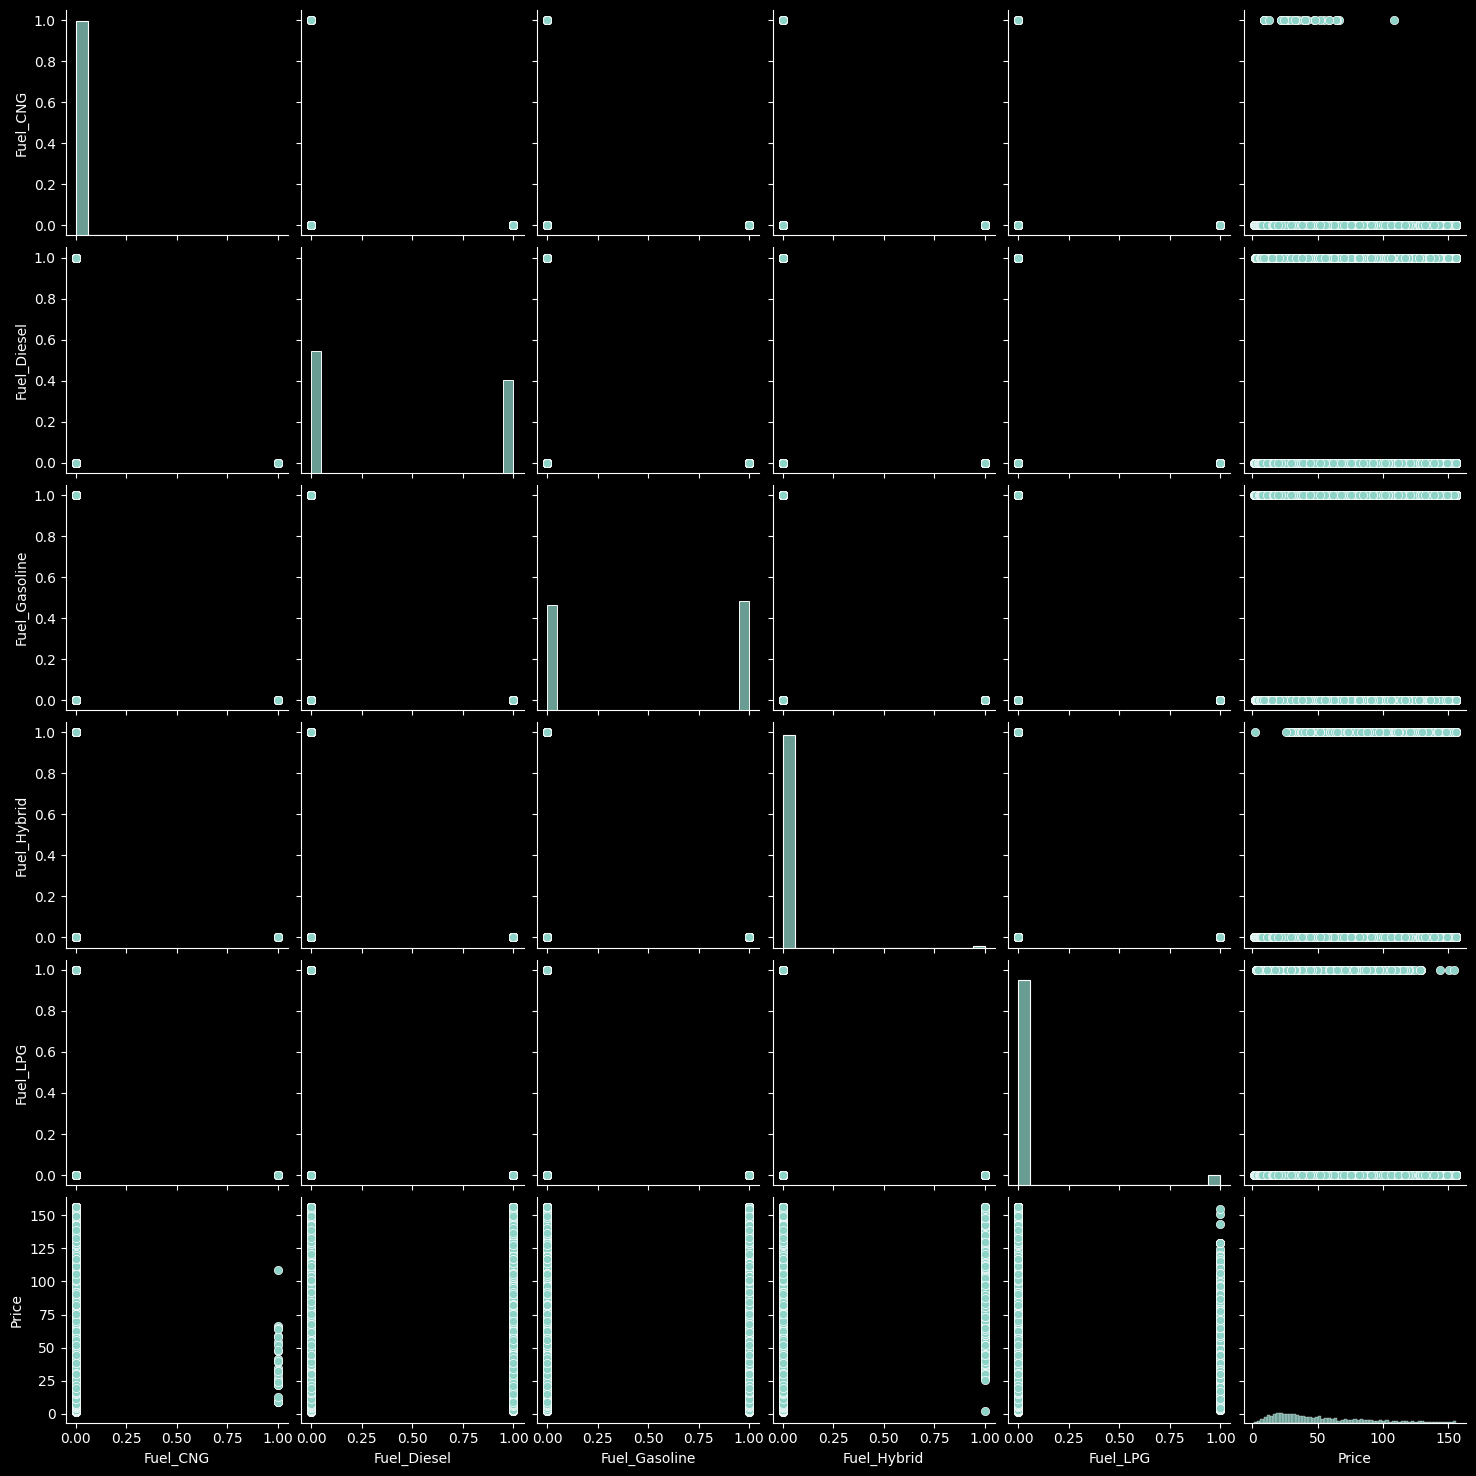

In [22]:
import seaborn as sns

sns.pairplot(df[['Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline','Fuel_Hybrid','Fuel_LPG','Price']]);

In [92]:
# decode
#for i,label in enumerate(encoder.classes_):
#    df['Brand'] = encoder.inverse_transform(range(0,len(encoder)))

# 모델명 별 평균 가격 
tmp = df[['Brand','Model','Price']]
#tmp.groupby('Brand')['Price'].mean()
tmp_brand = tmp.groupby('Brand')['Price'].agg(**{'mean_price':'mean'}).reset_index().sort_values(by=['mean_price'])

tmp_model = tmp.groupby('Model')['Price'].agg(**{'mean_price':'mean'}).reset_index().sort_values(by=['mean_price'])
print(tmp_brand)
#print(tmp_model)

# 브랜드 순서대로 정렬
sorted_brand_name = []
for b in tmp_brand:
    sorted_brand_name.append(tmp_brand['Brand'])
print('------------------------')
print('sorted : ', sorted_brand_name)

# priority_dict = {sorted_brand_name : range(0,len(sorted_brand_name))}
# print(priority_dict)

# 순서대로 mapping
label_col = ['Brand','Model']
brand_mapping = {iter:v for iter,v in enumerate(sorted_brand_name)}
mapped_brand = df['Brand'].map(brand_mapping)

print('----map--------------------')
print(mapped_brand.info())
#df['Brand'].info

# 기울기 
# 브랜드 별 민값이 변화 구간 정도.

            Brand  mean_price
2         citroen   34.100009
3            fiat   34.730608
12           opel   38.622353
14        renault   39.835038
15           seat   42.474031
10     mitsubishi   42.890080
4            ford   45.881003
5           honda   50.290231
18     volkswagen   51.882035
8           mazda   52.569392
9   mercedes-benz   55.005872
0            audi   55.430571
1             bmw   56.934177
11         nissan   57.725413
7             kia   58.415239
17         toyota   58.447769
13        peugeot   58.654981
6         hyundai   59.569832
16          skoda   60.714257
19          volvo   70.443323
------------------------
sorted :  [2           citroen
3              fiat
12             opel
14          renault
15             seat
10       mitsubishi
4              ford
5             honda
18       volkswagen
8             mazda
9     mercedes-benz
0              audi
1               bmw
11           nissan
7               kia
17           toyota
13          pe

브랜드 분석

In [158]:
# 이상치가 많이 분포되있는 가격 100이상의 데이터들과 박스plot안의 범위인 30~80이하의 데이터를 가져오기
df['year_model'] = df['Year_prd'].astype(str)+'_' + df['Model']
under_price = df[(df['Price'] >= 30) & (df['Price'] <= 80)]
over_price = df[(df['Price'] >= 100)]

C:\Users\user\AppData\Local\Temp\ipykernel_16332\2161140373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_model'] = df['Year_prd'].astype(str)+'_' + df['Model']


In [159]:
# 두 범주의 교집합 추출
set1 = set(under_price["year_model"].unique())
set2 = set(over_price["year_model"].unique())

intersection = set1.intersection(set2)

intersection = list(intersection)

In [160]:
# 두 가격대에서 모두 등장한 차량들의 평균
filtered_df = df[df['year_model'].isin(intersection)]
filtered_df.describe()

,Year_prd,Year_model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
count,13607.000000,13607.000000,13607.000000,13607.000000,13607.000000,13607.000000,13607.000000,13607.000000,13607.000000,13607.000000,13607.000000,13607.000000
mean,2014.945175,2011.472624,1727.784670,7.881164,142040.290071,1917.582641,0.000294,0.547659,0.411920,0.022268,0.017858,83.080132
std,3.798960,3.998985,909.766072,4.949821,80210.430426,635.695487,0.017144,0.497742,0.492199,0.147559,0.132442,27.878265
min,1992.000000,1989.000000,0.000000,0.000000,200.000000,898.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.300000
25%,2013.000000,2009.000000,1044.000000,5.000000,80127.000000,1591.000000,0.000000,0.000000,0.000000,0.000000,0.000000,64.870000
50%,2016.000000,2012.000000,1800.000000,6.000000,136091.000000,1968.000000,0.000000,1.000000,0.000000,0.000000,0.000000,83.070000
75%,2018.000000,2014.000000,2655.000000,12.000000,193634.000000,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,100.600000
max,2021.000000,2020.000000,3219.000000,16.000000,900000.000000,6300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,156.000000


In [161]:
filtered_df['Year_prd'].corr(filtered_df['Price']), filtered_df['Mileage'].corr(filtered_df['Price'])

(0.4930178270215299, -0.4687214050683724)

감가상각이 큰 모델들 -> 모델명과의 상관관계

In [167]:
# 두 가격대에서 모두 등장한 고가 차량들
filtered_df = over_price[over_price['year_model'].isin(intersection)]
filtered_df.describe()

models = set(filtered_df['Model'])
len(models)


99

In [169]:
en = strToInt(['Brand','Model'],filtered_df)
filtered_df['Model'].corr(filtered_df['Price']),filtered_df['Brand'].corr(filtered_df['Price'])

C:\Users\user\AppData\Local\Temp\ipykernel_16332\4049387445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.transform(item_label)
C:\Users\user\AppData\Local\Temp\ipykernel_16332\4049387445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.transform(item_label)


(-0.015243103981643892, -0.0222790073847276)

['ID', 'Year_prd', 'Year_model', 'Brand', 'Model', 'City', 'Area', 'Mileage', 'CC', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline', 'Fuel_Hybrid', 'Fuel_LPG', 'Price', 'year_model']


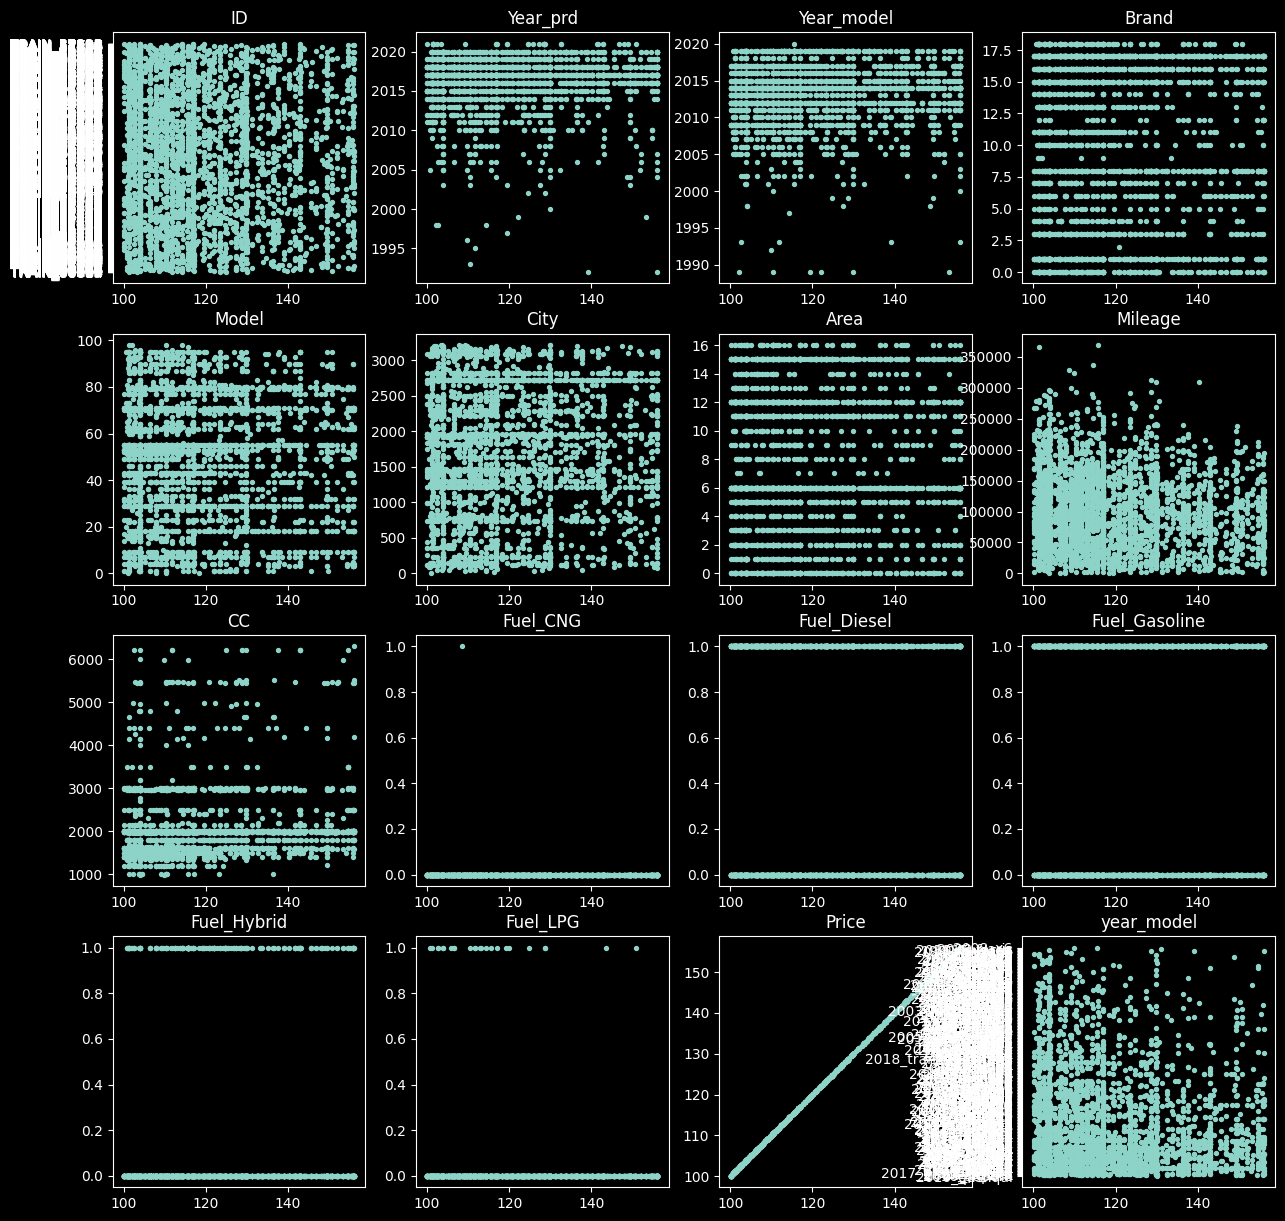

In [170]:
tmp = filtered_df.dtypes
valList=[]
findType=['int32','int64','float32','float64']
for index, val in zip(tmp.index, tmp.values):
    #if index in findType:
    valList.append(index)

print(valList)
#lenL = len(valList)

figure = plt.figure(figsize=(15,15))
for cnt, val in enumerate(valList):
    plt.subplot(4, 4, cnt+1)
    plt.scatter(filtered_df['Price'], filtered_df[val],s=8)
    plt.title(val)

#그림 파일 세이브
figure.savefig('scatter02.png')

다시 돌아옴

In [99]:
# 30~80가격대에서만 등장한 차량의 평균
under_price = under_price[~under_price['year_model'].isin(intersection)]
under_price.describe()

,Year_prd,Year_model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
count,19149.000000,19149.000000,19149.000000,19149.000000,19149.000000,19149.000000,19149.000000,19149.000000,19149.000000,19149.000000,19149.000000,19149.000000
mean,2011.905583,2008.551569,1699.742493,7.914095,166300.318189,1766.987206,0.000627,0.436524,0.504987,0.007520,0.050342,47.126408
std,3.504222,3.607422,909.526048,4.874976,72167.188018,537.897755,0.025026,0.495967,0.499988,0.086393,0.218656,12.536215
min,1983.000000,1983.000000,0.000000,0.000000,200.000000,875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.030000
25%,2010.000000,2007.000000,1028.000000,5.000000,115534.000000,1398.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.270000
50%,2012.000000,2008.000000,1710.000000,6.000000,167700.000000,1598.000000,0.000000,0.000000,1.000000,0.000000,0.000000,45.240000
75%,2014.000000,2011.000000,2492.000000,12.000000,213000.000000,1995.000000,0.000000,1.000000,1.000000,0.000000,0.000000,55.770000
max,2021.000000,2021.000000,3220.000000,16.000000,657130.000000,5998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,79.950000


In [100]:
under_price['Year_prd'].corr(under_price['Price']), under_price['Mileage'].corr(under_price['Price'])

(0.44302493767604706, -0.3136944320711926)

In [132]:
# 100이상의 가격대에서만 등장한 차량의 평균
over_price = over_price[~over_price['year_model'].isin(intersection)]
over_price.describe()

,Year_prd,Year_model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price
count,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.0,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,2017.110921,2012.837042,1757.638480,8.169120,101604.148237,1990.963026,0.0,0.508388,0.471414,0.015748,0.004451,125.242657
std,2.607948,3.388560,908.990942,4.943879,71765.075792,649.509561,0.0,0.500015,0.499268,0.124520,0.066575,15.859688
min,1989.000000,1989.000000,37.000000,0.000000,200.000000,988.000000,0.0,0.000000,0.000000,0.000000,0.000000,100.100000
25%,2016.000000,2011.000000,1090.000000,5.000000,43573.000000,1591.000000,0.0,0.000000,0.000000,0.000000,0.000000,111.800000
50%,2018.000000,2013.000000,1802.000000,6.000000,88000.000000,1968.000000,0.0,1.000000,0.000000,0.000000,0.000000,123.370000
75%,2019.000000,2015.000000,2729.000000,12.000000,150000.000000,1997.000000,0.0,1.000000,1.000000,0.000000,0.000000,136.500000
max,2021.000000,2021.000000,3222.000000,16.000000,543210.000000,6208.000000,0.0,1.000000,1.000000,1.000000,1.000000,156.000000


In [134]:
over_price['Year_prd'].corr(over_price['Price']), over_price['Mileage'].corr(over_price['Price'])

(0.08345175148904324, -0.1253081583683395)

In [141]:
en = strToInt(['Brand','Model'],over_price)
over_price['Model'].corr(over_price['Price']),over_price['Brand'].corr(over_price['Price'])

C:\Users\user\AppData\Local\Temp\ipykernel_16332\4049387445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.transform(item_label)
C:\Users\user\AppData\Local\Temp\ipykernel_16332\4049387445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.transform(item_label)


(0.02683241548524299, 0.020155131226521242)

In [142]:
en = strToInt(['Brand','Model'],under_price)
under_price['Model'].corr(under_price['Price']),under_price['Brand'].corr(under_price['Price'])

C:\Users\user\AppData\Local\Temp\ipykernel_16332\4049387445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.transform(item_label)
C:\Users\user\AppData\Local\Temp\ipykernel_16332\4049387445.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = encoder.transform(item_label)


(0.09901450571008702, 0.04201451947987313)

['ID', 'Year_prd', 'Year_model', 'Brand', 'Model', 'City', 'Area', 'Mileage', 'CC', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline', 'Fuel_Hybrid', 'Fuel_LPG', 'Price', 'year_model']


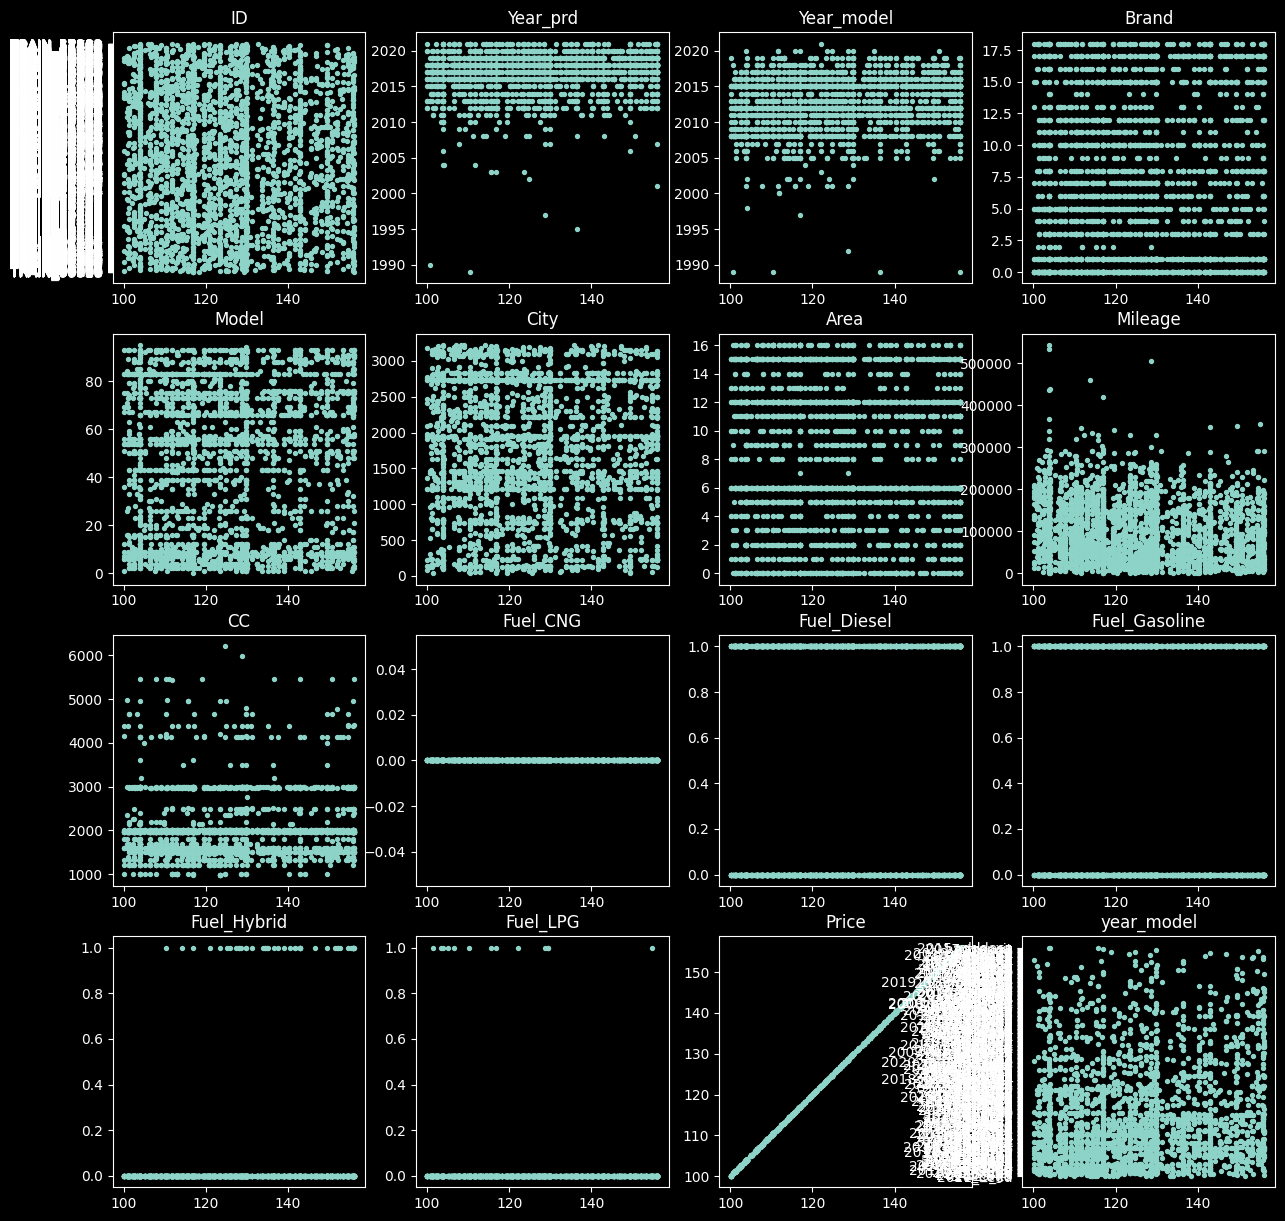

In [140]:
tmp = over_price.dtypes
valList=[]
findType=['int32','int64','float32','float64']
for index, val in zip(tmp.index, tmp.values):
    #if index in findType:
    valList.append(index)

print(valList)
#lenL = len(valList)

figure = plt.figure(figsize=(15,15))
for cnt, val in enumerate(valList):
    plt.subplot(4, 4, cnt+1)
    plt.scatter(over_price['Price'], over_price[val],s=8)
    plt.title(val)

#그림 파일 세이브
figure.savefig('scatter01.png')

In [110]:
a,b,c = len(over_price), len(df), len(under_price)

a/b*100

over_price['Price'].mean()
df['Price'].mean()
over_price['Price'].sum() / df['Price'].sum() *100


12.662786050933592

In [121]:
print(a,b,c)

2921 56698 19149


5% 데이터 이상치로 판별 제거하고 계산

In [191]:
#tmp = df[~over_price['year_model'].isin(intersection)]
tmp = df.drop(index = over_price['ID'].index)
tmp

strToInt(['Brand','Model'],tmp)
tmp.drop('year_model',axis=1)
tmp.drop('ID',axis=1)

,Year_prd,Year_model,Brand,Model,City,Area,Mileage,CC,Fuel_CNG,Fuel_Diesel,Fuel_Gasoline,Fuel_Hybrid,Fuel_LPG,Price,year_model
0,2018,2014,16,46,1214,12,85231,999,0,0,1,0,0,51.74,2018_fabia
1,2010,2006,17,19,2137,13,135000,1598,0,0,1,0,0,41.47,2010_auris
2,2002,2002,9,35,785,15,255223,1796,0,0,1,0,0,17.81,2002_clk-klasa
3,2006,2001,11,131,546,15,238000,2184,0,1,0,0,0,18.20,2006_x-trail
4,2007,2007,3,24,1839,5,251000,1910,0,1,0,0,0,17.55,2007_bravo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57914,2010,2009,14,100,1829,12,126000,1598,0,0,1,0,0,29.90,2010_scenic
57916,2006,2005,12,140,2941,16,299850,1796,0,0,1,0,0,15.47,2006_zafira
57917,2013,2003,3,89,287,6,112000,1368,0,0,1,0,0,21.97,2013_punto
57918,2006,2004,12,18,3174,0,189321,1598,0,0,1,0,0,16.77,2006_astra


In [157]:
tmp = df.drop(over_price)

KeyError: "['ID', 'Year_prd', 'Year_model', 'Brand', 'Model', 'City', 'Area', 'Mileage', 'CC', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Gasoline', 'Fuel_Hybrid', 'Fuel_LPG', 'Price', 'year_model'] not found in axis"

In [189]:
def prepro(data):
    df = columns_toENG(data)
    df = drop_newCar(df,200)
    df = df[df['Mileage'] != df['Mileage'].max()]

    label_col = ['City','Area','Brand','Model']
    encoder = strToInt(label_col, df)
    return df

In [188]:
import pickle

## Save pickle
with open("data_.pickle","wb") as fw:
    pickle.dump(tmp, fw)

In [190]:
# test 전처리

test_data = pd.read_csv('../data/test.csv')
#print(diabetes_data['가격'].value_counts())
test_data.head(3)

test_df = prepro(test_data)
## Save pickle
with open("data_test.pickle","wb") as fw:
    pickle.dump(tmp, fw)

Before Datasets size :  14480
Delete Datasets size :  289
After Datasets size :  14191
